In [89]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
veriler = pd.read_csv('veriler.csv')

## veriler csv dosyasını pickle'a çevirip inceleyeceğim. neden? daha hızlı ve daha managable 

In [3]:
veriler.to_pickle('veriler.pkl')

In [4]:
data = pd.read_pickle('veriler.pkl')

In [5]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [7]:
data.shape

(22, 5)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
boy,22.0,163.363636,21.077059,125.0,156.00,165.5,179.25,193.0
kilo,22.0,62.136364,22.286651,30.0,42.50,59.5,80.00,105.0
yas,22.0,28.681818,12.988590,9.0,22.25,28.5,38.00,55.0


### missing value problemi var mı inceleme yapalım ve ona göre hareket edelim

In [9]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [10]:
data.isnull().sum()

ulke        0
boy         0
kilo        0
yas         0
cinsiyet    0
dtype: int64

#### sıkıntı yok devam

In [11]:
data.dtypes

ulke        object
boy          int64
kilo         int64
yas          int64
cinsiyet    object
dtype: object

In [13]:
#data_numeric = data.select_dtypes(include=['int'])
#data_numeric.head(3)

### verilde cinsiyet ve ülke columnuna one-hot encoding uygulayalım, daha sonra da cinsiyet columnunu atalım

In [12]:
# define the categorical columns to exclude from normalization
categorical_columns = data.select_dtypes(include = 'object').columns.to_list()
print(categorical_columns)

['ulke', 'cinsiyet']


In [13]:
categorical = categorical_columns

# define the columns to include in normalization
columns_to_normalize = [col for col in data.columns if col not in categorical]
print(columns_to_normalize)

['boy', 'kilo', 'yas']


# get the data to be scaled
df_continious = data[columns_to_normalize]

min_max_columns_names = list(df_continious.columns)
all_scalers = {}

for column_name in min_max_columns_names:
    all_scalers[column_name] = MinMaxScaler().fit(df_continious[[column_name]])
    
# -1 ve 1 arasında korelasyonun da gözükebileceği biçimde bir data normlizaston
çakalım
for column_name, scaler in  all_scalers.items():
    df_continious[column_name] = scaler.transform(df_continious[[column_name]].values.reshape(-1,1))
    

In [14]:
from sklearn.preprocessing import MinMaxScaler

df_continuous = data[columns_to_normalize]
min_max_columns_names = list(df_continuous.columns)
all_scalers = {}

for column_name in min_max_columns_names:
    scaler = MinMaxScaler()
    scaler.fit(df_continuous[[column_name]])
    all_scalers[column_name] = scaler
    
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(0, 1))


C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_7784\689206453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(-1, 1))
C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_7784\689206453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [15]:
normalized_data = pd.concat([df_continuous,data[categorical]], axis= 1)
normalized_data = normalized_data.reindex(data.columns, axis = 1)
normalized_data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808824,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


In [16]:
data[categorical].head(5)

,ulke,cinsiyet
0,tr,e
1,tr,e
2,tr,k
3,tr,k
4,tr,e


## kendime not: bu işlemden önce verideki diğer featurelar üzerinde data normalization uygulasaydım ve distribution based bir yaklaşımdan uzak kalsam daha güzel sonuçlarla karşılaşabilirim.

In [17]:
cols_to_encode = ['cinsiyet', 'ulke']

# one-hot encode the selected columns and append them to your original dataframe
encoded_cols = pd.get_dummies(data[cols_to_encode], dtype = np.float32)
df = pd.concat([data[categorical], encoded_cols],axis=1)

# drop the original columns that were one-hot encoded
df.drop(cols_to_encode, axis=1,inplace=True)
df.head(5)

,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0


# şu anda, elimizde normalize edilmiş veri ve one hot encoding atılmış yeni feature'lar var. birleştirelim ve bir regression işlemi uygulayalım

In [18]:
# float veri oluşturan columnları hazırlayalım
float_columns = normalized_data.select_dtypes(include=['float']).columns
float_data = normalized_data[float_columns]

normalized_data = pd.concat([float_data, df], axis=1)

In [19]:
normalized_data

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,0.073529,0.000000,0.021739,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.080000,0.043478,1.0,0.0,0.0,1.0,0.0
2,0.147059,0.053333,0.021739,0.0,1.0,0.0,1.0,0.0
3,0.117647,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,0.058824,0.106667,0.065217,1.0,0.0,0.0,1.0,0.0
5,0.808824,0.800000,0.456522,1.0,0.0,0.0,1.0,0.0
6,0.955882,0.666667,0.347826,1.0,0.0,0.0,1.0,0.0
7,0.735294,0.800000,0.565217,1.0,0.0,0.0,1.0,0.0
8,0.764706,0.400000,0.282609,0.0,1.0,0.0,1.0,0.0
9,0.882353,1.000000,0.521739,1.0,0.0,0.0,0.0,1.0


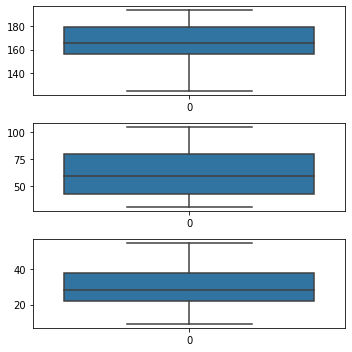

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['boy'], ax = axs[0])
plt2 = sns.boxplot(data['kilo'], ax = axs[1])
plt3 = sns.boxplot(data['yas'], ax = axs[2])


plt.tight_layout()

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


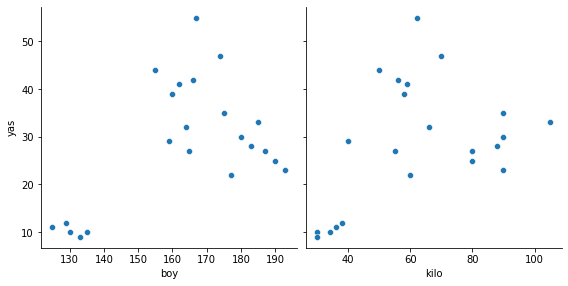

In [21]:
# yaşa göre boy ve kilo dağılımı
sns.pairplot(data, x_vars=['boy', 'kilo'], y_vars='yas', height=4, aspect=1, kind='scatter')
plt.show()

In [22]:
data.yas.value_counts()

yas
10    2
27    2
39    1
32    1
29    1
28    1
23    1
47    1
55    1
41    1
44    1
11    1
33    1
22    1
35    1
25    1
30    1
12    1
9     1
42    1
Name: count, dtype: int64

In [23]:
print(list(normalized_data.columns))

['boy', 'kilo', 'yas', 'cinsiyet_e', 'cinsiyet_k', 'ulke_fr', 'ulke_tr', 'ulke_us']


In [24]:
## outlier olarak bi fonksiyon var elimde ama kullanmaya üşendim görülen genel olarak veride bir outlier durum olmadığı

## korelasyon incelemesi yapalım

In [25]:
rs = np.random.RandomState(0)
new_df = pd.DataFrame(rs.rand(10,10))

corr = normalized_data.loc[:,['boy', 'kilo', 'yas', 'cinsiyet_e', 'cinsiyet_k', 'ulke_fr', 'ulke_tr', 'ulke_us']].corr().abs()

corr.style.background_gradient(cmap = 'coolwarm')

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
boy,1.000000,0.899177,0.508706,0.238393,0.238393,0.390761,0.432217,0.068487
kilo,0.899177,1.000000,0.423259,0.473871,0.473871,0.246708,0.302420,0.075849
yas,0.508706,0.423259,1.000000,0.247153,0.247153,0.209387,0.685811,0.538132
cinsiyet_e,0.238393,0.473871,0.247153,1.000000,1.000000,0.097590,0.277350,0.408248
cinsiyet_k,0.238393,0.473871,0.247153,1.000000,1.000000,0.097590,0.277350,0.408248
ulke_fr,0.390761,0.246708,0.209387,0.097590,0.097590,1.000000,0.568399,0.418330
ulke_tr,0.432217,0.302420,0.685811,0.277350,0.277350,0.568399,1.000000,0.509525
ulke_us,0.068487,0.075849,0.538132,0.408248,0.408248,0.418330,0.509525,1.000000


In [26]:
corr_high_boy = corr['boy'].where(corr['boy'] >= 0.3).dropna(how='all')
corr_high_boy.index

Index(['boy', 'kilo', 'yas', 'ulke_fr', 'ulke_tr'], dtype='object')

In [27]:
corr_high_kilo = corr['kilo'].where(corr['kilo'] >= 0.3).dropna(how='all')
corr_high_kilo.index

Index(['boy', 'kilo', 'yas', 'cinsiyet_e', 'cinsiyet_k', 'ulke_tr'], dtype='object')

In [28]:
corr_high_yas = corr['yas'].where(corr['yas'] >= 0.3).dropna(how='all')
corr_high_yas.index

Index(['boy', 'kilo', 'yas', 'ulke_tr', 'ulke_us'], dtype='object')

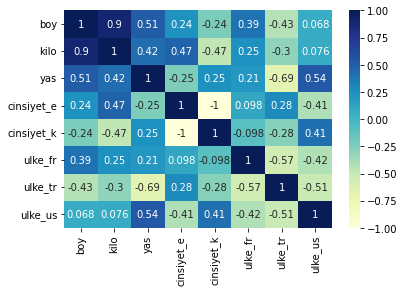

In [29]:
# yüksek korelasyonlu featureları çıkartalım
#corr_high_boy = corr['boy'].where(corr['boy'] >= 0.3).dropna(how='all')
#corr_high_kilo = corr['kilo'].where(corr['kilo'] >= 0.3).dropna(how='all')
#corr_high_yas = corr['yas'].where(corr['yas'] >= 0.3).dropna(how='all')
#corr_high_cinsiyet_e = corr['cinsiyet_e'].where(corr['cinsiyet_e'] >= 0.3).dropna(how='all')
#corr_high_cinsiyet_k = corr['cinsiyet_k'].where(corr['cinsiyet_k'] >= 0.3).dropna(how='all')
#corr_high_ulke_fr = corr['ulke_fr'].where(corr['ulke_fr'] >= 0.3).dropna(how='all')
#corr_high_ulke_tr = corr['ulke_tr'].where(corr['ulke_tr'] >= 0.3).dropna(how='all')
#corr_high_ulke_us = corr['ulke_us'].where(corr['ulke_us'] >= 0.3).dropna(how='all')
#
#corr_high_boy, corr_high_kilo, corr_high_yas

sns.heatmap(normalized_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [30]:
# Korelasyon matrisindeki üst üçgen kısmını maskeleyin
mask = np.triu(np.ones_like(corr, dtype=bool))

# Maskeleme işlemiyle sadece üst üçgen değerleri koruyun
upper_triangle = corr.mask(mask)

# Korelasyon matrisinin üst üçgen kısmında en yüksek değere sahip özellikleri bulun
highest_corr_features = upper_triangle.idxmax().tolist()

print(highest_corr_features)

['kilo', 'cinsiyet_k', 'ulke_tr', 'cinsiyet_k', 'ulke_us', 'ulke_tr', 'ulke_us', nan]


In [31]:
df

,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,1.0


In [32]:
columns = ['boy', 'kilo', 'yas', 'cinsiyet_e', 'cinsiyet_k', 'ulke_fr', 'ulke_tr','ulke_us']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

X = normalized_data['kilo']
y = normalized_data['boy']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [34]:
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(normalized_data['boy'], X_train_sm).fit()
lr.params #kiloyu alcaz

ValueError: The indices for endog and exog are not aligned

In [35]:
normalized_data

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,0.073529,0.000000,0.021739,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.080000,0.043478,1.0,0.0,0.0,1.0,0.0
2,0.147059,0.053333,0.021739,0.0,1.0,0.0,1.0,0.0
3,0.117647,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,0.058824,0.106667,0.065217,1.0,0.0,0.0,1.0,0.0
5,0.808824,0.800000,0.456522,1.0,0.0,0.0,1.0,0.0
6,0.955882,0.666667,0.347826,1.0,0.0,0.0,1.0,0.0
7,0.735294,0.800000,0.565217,1.0,0.0,0.0,1.0,0.0
8,0.764706,0.400000,0.282609,0.0,1.0,0.0,1.0,0.0
9,0.882353,1.000000,0.521739,1.0,0.0,0.0,0.0,1.0


## bir üstteki indent için bir alternatif yaratalım. inceleme açısından fayda görebiliriz

In [59]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data, y, train_size = 0.7, test_size = 0.3, random_state = 42)
r2 = LinearRegression()
r2.fit(x_train, y_train)

y_pred = r2.predict(x_test)



In [60]:
# X = np.append( arr = np.ones(22,1).astype(float), values=normalized_data,axis=1)

In [61]:
#separating independent and dependent variable
X = normalized_data.iloc[:,1:].values
y = normalized_data.iloc[:,0].values
#splitting normalized_data into training and testing normalized_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [62]:
# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = sm.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [63]:
normalized_data

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,0.073529,0.000000,0.021739,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.080000,0.043478,1.0,0.0,0.0,1.0,0.0
2,0.147059,0.053333,0.021739,0.0,1.0,0.0,1.0,0.0
3,0.117647,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,0.058824,0.106667,0.065217,1.0,0.0,0.0,1.0,0.0
5,0.808824,0.800000,0.456522,1.0,0.0,0.0,1.0,0.0
6,0.955882,0.666667,0.347826,1.0,0.0,0.0,1.0,0.0
7,0.735294,0.800000,0.565217,1.0,0.0,0.0,1.0,0.0
8,0.764706,0.400000,0.282609,0.0,1.0,0.0,1.0,0.0
9,0.882353,1.000000,0.521739,1.0,0.0,0.0,0.0,1.0


In [64]:
# Preprocessing data

X = normalized_data.iloc[:, 1:].values         # Selecting all columns except last one that is 'boy'.
y = normalized_data['boy'].values

# # Adding constant values at start of array X
# X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

regressor_SLR_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     15.23
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           0.000367
Time:                        21:49:02   Log-Likelihood:                 13.803
No. Observations:                  15   AIC:                            -15.61
Df Residuals:                       9   BIC:                            -11.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9810      0.245      4.003      0.0

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### x3 baya büyük geldi önce onu çıkartalım. (P testi sonucu olarak) 

In [65]:
# Remove x3 from the X array
X = X[:, [0, 1, 2, 3, 4, 6]]  # Remove the column associated with x3 (index 5) from X

# Fit the new regression model after removing x3
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        21:49:02   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0160      0.131      7.737      0.0

#### x3 değeri üzerinde tekrar bi işlem daha (backward elimination)

In [66]:
# Preprocessing data
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x3 from the X array
X = np.delete(X, 2, axis=1)  # Remove the column associated with x3 (index 2) from X

# Fit the new regression model after removing x3
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        21:49:03   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

#### bu sefer de x çıkartarak backward elimination yapalım

In [67]:
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x3 and x5 from the X array
X = np.delete(X, [2, 5], axis=1)  # Remove the columns associated with x3 (index 2) and x5 (index 4) from X

# Fit the new regression model after removing x3 and x5
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3 and x5
print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        21:49:03   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

#### bu sefer de x2 çıkartıp backward elimination işlemine devam edelim

In [68]:
X = np.delete(X, 1, axis=1)  # X içinden x2 (indeks 1) değişkenini çıkarın
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2.947
Date:                Fri, 21 Jul 2023   Prob (F-statistic):             0.0607
Time:                        21:49:04   Log-Likelihood:               -0.54112
No. Observations:                  22   AIC:                             9.082
Df Residuals:                      18   BIC:                             13.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4810      0.069      6.935      0.0

#### bu sefer de x4 çıkartıp backward elimination işlemine devam edelim

In [69]:
# Verileri işleme
X = normalized_data.iloc[:, 1:4].values  # İlk üç değişkeni (x1, x2, x3) alın
y = normalized_data['boy'].values

# X'in başına sabit değerleri ekleyin
X = sm.add_constant(X)

# Tüm öngörücülerle başlayarak ilk regresyon modelini oluşturun
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# İlk regresyon modelinin özetine bakın
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     35.28
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           9.51e-08
Time:                        21:49:05   Log-Likelihood:                 16.279
No. Observations:                  22   AIC:                            -24.56
Df Residuals:                      18   BIC:                            -20.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1726      0.064      2.718      0.0

### x2 çıkart

In [70]:
X = np.delete(X, 2, axis=1) 
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     55.55
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.16e-08
Time:                        21:49:05   Log-Likelihood:                 16.226
No. Observations:                  22   AIC:                            -26.45
Df Residuals:                      19   BIC:                            -23.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1843      0.048      3.825      0.0

## makul bir tablo yeterli çaba.

In [78]:
x_train, x_test

(        kilo       yas  cinsiyet_e  cinsiyet_k  ulke_fr  ulke_tr  ulke_us
 11  0.266667  0.760870         0.0         1.0      0.0      0.0      1.0
 3   0.000000  0.000000         0.0         1.0      0.0      1.0      0.0
 4   0.106667  0.065217         1.0         0.0      0.0      1.0      0.0
 17  0.666667  0.391304         1.0         0.0      1.0      0.0      0.0
 12  0.373333  0.652174         0.0         1.0      0.0      0.0      1.0
 18  0.773333  0.413043         1.0         0.0      1.0      0.0      0.0
 16  0.800000  0.304348         1.0         0.0      1.0      0.0      0.0
 2   0.053333  0.021739         0.0         1.0      0.0      1.0      0.0
 9   1.000000  0.521739         1.0         0.0      0.0      0.0      1.0
 21  0.346667  0.717391         0.0         1.0      1.0      0.0      0.0
 7   0.800000  0.565217         1.0         0.0      0.0      1.0      0.0
 10  0.333333  0.391304         0.0         1.0      0.0      0.0      1.0
 14  0.426667  1.000000  

In [83]:
x = normalized_data[["kilo","yas","cinsiyet_e","cinsiyet_k","ulke_fr","ulke_tr","ulke_us"]]
y = normalized_data[["boy"]]

In [84]:
 #model 
r2 = LinearRegression()
r2.fit(x_train, y_train)



LinearRegression()

In [85]:
y_pred = r2.predict(x_test)
y_pred

array([0.02100957, 0.54580673, 0.56140155, 0.10054369, 0.727041  ,
       0.82688298, 0.79427106])

In [86]:
#Intercept and Coefficient
print("Intercept: ", r2.intercept_)
print("Coefficients:")
list(zip(x, r2.coef_))

Intercept:  0.12807436639105985
Coefficients:


[('kilo', 0.981011465701549),
 ('yas', 0.04844776342557715),
 ('cinsiyet_e', -0.06767442584316835),
 ('cinsiyet_k', 0.06767442584316835),
 ('ulke_fr', 0.10341287843428926),
 ('ulke_tr', -0.040443587611857096),
 ('ulke_us', -0.0629692908224322)]

In [110]:
y_pred_r2= r2.predict(x_test)  
x_pred_r2= r2.predict(x_train) 

print("Prediction for test set: {}".format(y_pred_r2))

Prediction for test set: [0.02100957 0.54580673 0.56140155 0.10054369 0.727041   0.82688298
 0.79427106]


In [89]:
#Actual value and the predicted value
r2_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_r2})
r2_diff.head()

,Actual value,Predicted value
0,0.073529,0.021010
1,0.544118,0.545807
2,0.764706,0.561402
3,0.000000,0.100544
4,0.720588,0.727041


###  mesela bir boy tahmini yapalım

In [90]:
normalized_data

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,0.073529,0.000000,0.021739,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.080000,0.043478,1.0,0.0,0.0,1.0,0.0
2,0.147059,0.053333,0.021739,0.0,1.0,0.0,1.0,0.0
3,0.117647,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0
4,0.058824,0.106667,0.065217,1.0,0.0,0.0,1.0,0.0
5,0.808824,0.800000,0.456522,1.0,0.0,0.0,1.0,0.0
6,0.955882,0.666667,0.347826,1.0,0.0,0.0,1.0,0.0
7,0.735294,0.800000,0.565217,1.0,0.0,0.0,1.0,0.0
8,0.764706,0.400000,0.282609,0.0,1.0,0.0,1.0,0.0
9,0.882353,1.000000,0.521739,1.0,0.0,0.0,0.0,1.0


In [96]:
r2.predict([[0.8, 0.282609,1.0, 0.0, 0.0, 1.0,0.0]])

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.8184573])

#### mesela bu sallama stilinde boy için 0.818457 değerini verdi. tabi bunu unnormalized etmek gerek.

## MAE, MSE, MAPE  ve RMSE için error hesabı 

In [106]:
def mean_absolute_percentage_error(y_true, y_pred):
    n = len(y_true)
    mape = 0
    for i in range(n):
        if y_true[i] != 0:
            mape += np.abs((y_true[i] - y_pred[i]) / y_true[i])
    mape = 100 / n * mape
    return mape

In [108]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_r2)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_r2)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_r2))
mape = mean_absolute_percentage_error(y_test, y_pred_r2)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error: %', mape)


Mean Absolute Error: 0.08618725925975435
Mean Square Error: 0.014756789828437243
Root Mean Square Error: 0.12147752808004139
Mean Absolute Percentage Error: % 19.991420770448517


In [ ]:
[('kilo', 0.981011465701549),
 ('yas', 0.04844776342557715),
 ('cinsiyet_e', -0.06767442584316835),
 ('cinsiyet_k', 0.06767442584316835),
 ('ulke_fr', 0.10341287843428926),
 ('ulke_tr', -0.040443587611857096),
 ('ulke_us', -0.0629692908224322)]

In [ ]:
  OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     55.55
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.16e-08
Time:                        21:49:05   Log-Likelihood:                 16.226
No. Observations:                  22   AIC:                            -26.45
Df Residuals:                      19   BIC:                            -23.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1843      0.048      3.825      0.001       0.083       0.285
x1             1.0576      0.104     10.183      0.000       0.840       1.275
x2            -0.1466      0.060     -2.431      0.025      -0.273      -0.020
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.076
Skew:                           0.239   Prob(JB):                        0.584
Kurtosis:                       2.028   Cond. No.                         5.22
==============================================================================

# bu tablo backward elimination son hali idi. ona göre bir tahmin yaptıralım

In [125]:
x_combined

array([0.        , 0.38666667, 0.4       , 0.08      , 0.53333333,
       0.8       , 0.48      ])

### elimden geldiğince multiple linear regresyon işte

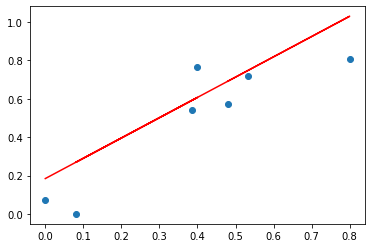

In [126]:

plt.scatter(x_combined, y_test)
plt.plot(x_combined, 0.1843 + 1.0576 *x_combined, 'r')
plt.show()

0.199968 + 0.8785 * kilo param gibi bişey olcak galiba

y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)
r_squared

X_test.shape, y_test.shape

plt.scatter(X_test, y_test)
plt.plot(X_test, 0.199968 + 0.8785 * X_test, 'r')
plt.show()

## aynı işlemleri normalizasyon değil de standardizasyon yapılmış biçimde tekrardan ayarlayalım

In [128]:
# define the categorical columns to exclude from normalization
categorical_columns = data.select_dtypes(include = 'object').columns.to_list()
print(categorical_columns)

categorical = categorical_columns

# define the columns to include in normalization
columns_to_standardize = [col for col in data.columns if col not in categorical]
print(columns_to_standardize)

['ulke', 'cinsiyet']
['boy', 'kilo', 'yas']


In [129]:
from sklearn.preprocessing import StandardScaler

df_continuous = data[columns_to_standardize]
standardize_columns_names = list(df_continuous.columns)
all_scalers = {}

for column_name in standardize_columns_names:
    scaler = StandardScaler()
    scaler.fit(df_continuous[[column_name]])
    all_scalers[column_name] = scaler
    
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(-1, 1))


C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_7784\3958081243.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(-1, 1))
C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_7784\3958081243.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [130]:
standardized_data = pd.concat([df_continuous,data[categorical]], axis= 1)
standardized_data = standardized_data.reindex(data.columns, axis = 1)
standardized_data

,ulke,boy,kilo,yas,cinsiyet
0,tr,-1.620187,-1.475889,-1.472173,e
1,tr,-1.862994,-1.200334,-1.393371,e
2,tr,-1.377379,-1.292185,-1.472173,k
3,tr,-1.474502,-1.475889,-1.550975,k
4,tr,-1.668748,-1.108482,-1.314568,e
5,tr,0.807886,1.279660,0.103876,e
6,tr,1.293501,0.820402,-0.290136,e
7,tr,0.565079,1.279660,0.497888,e
8,tr,0.662202,-0.098114,-0.526544,k
9,us,1.050693,1.968547,0.340283,e


In [131]:
cols_to_encode = ['cinsiyet', 'ulke']

# one-hot encode the selected columns and append them to your original dataframe
encoded_cols = pd.get_dummies(data[cols_to_encode], dtype = np.float32)
df = pd.concat([data[categorical], encoded_cols],axis=1)

# drop the original columns that were one-hot encoded
df.drop(cols_to_encode, axis=1,inplace=True)
df.head(5)

,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0


In [132]:
# float veri oluşturan columnları hazırlayalım
float_columns = standardized_data.select_dtypes(include=['float']).columns
float_data = standardized_data[float_columns]

standardized_data = pd.concat([float_data, df], axis=1)

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


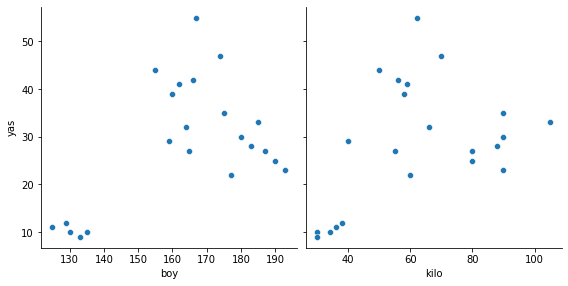

In [133]:
# yaşa göre boy ve kilo dağılımı
sns.pairplot(data, x_vars=['boy', 'kilo'], y_vars='yas', height=4, aspect=1, kind='scatter')
plt.show()

In [134]:
rs = np.random.RandomState(0)
new_df = pd.DataFrame(rs.rand(10,10))

corr = normalized_data.loc[:,['boy', 'kilo', 'yas', 'cinsiyet_e', 'cinsiyet_k', 'ulke_fr', 'ulke_tr', 'ulke_us']].corr().abs()

corr.style.background_gradient(cmap = 'coolwarm')

,boy,kilo,yas,cinsiyet_e,cinsiyet_k,ulke_fr,ulke_tr,ulke_us
boy,1.000000,0.899177,0.508706,0.238393,0.238393,0.390761,0.432217,0.068487
kilo,0.899177,1.000000,0.423259,0.473871,0.473871,0.246708,0.302420,0.075849
yas,0.508706,0.423259,1.000000,0.247153,0.247153,0.209387,0.685811,0.538132
cinsiyet_e,0.238393,0.473871,0.247153,1.000000,1.000000,0.097590,0.277350,0.408248
cinsiyet_k,0.238393,0.473871,0.247153,1.000000,1.000000,0.097590,0.277350,0.408248
ulke_fr,0.390761,0.246708,0.209387,0.097590,0.097590,1.000000,0.568399,0.418330
ulke_tr,0.432217,0.302420,0.685811,0.277350,0.277350,0.568399,1.000000,0.509525
ulke_us,0.068487,0.075849,0.538132,0.408248,0.408248,0.418330,0.509525,1.000000


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

X = standardized_data['kilo']
y = standardized_data['boy']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [136]:
#separating independent and dependent variable
X = standardized_data.iloc[:,1:].values
y = standardized_data.iloc[:,0].values
#splitting standardized_data into training and testing standardized_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [137]:
# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = sm.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [138]:
# Preprocessing data

X = standardized_data.iloc[:, 1:].values         # Selecting all columns except last one that is 'boy'.
y = standardized_data['boy'].values

# # Adding constant values at start of array X
# X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

regressor_SLR_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     15.23
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           0.000367
Time:                        22:49:15   Log-Likelihood:                -4.1158
No. Observations:                  15   AIC:                             20.23
Df Residuals:                       9   BIC:                             24.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9405      0.235      4.003      0.0

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [139]:
# Preprocessing data
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x2 from the X array
X = np.delete(X, 1, axis=1)  # Remove the column associated with x1 (index 1) from X

# Fit the new regression model after removing x2
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        22:51:14   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

In [140]:
# Preprocessing data
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x3 from the X array
X = np.delete(X, 2, axis=1)  # Remove the column associated with x3 (index 2) from X

# Fit the new regression model after removing x2
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        22:51:44   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

In [141]:
# Preprocessing data
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x5 from the X array
X = np.delete(X, 4, axis=1)  # Remove the column associated with x5 (index 4) from X

# Fit the new regression model after removing x2
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        22:52:29   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

In [143]:
# Preprocessing data
X = normalized_data.iloc[:, 1:].values
y = normalized_data['boy'].values

# Adding constant values at the start of array X
X = sm.add_constant(X)

# Fit the initial regression model with all predictors
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the initial regressor
print(regressor_SLR_OLS.summary())

# Remove x1 from the X array
X = np.delete(X, 0, axis=1)  # Remove the column associated with x1 (index 0) from X

# Fit the new regression model after removing x2
regressor_SLR_OLS = sm.OLS(endog=y, exog=X).fit()

# Looking at the summary of the updated regressor after removing x3
print(regressor_SLR_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        22:53:26   Log-Likelihood:                 18.879
No. Observations:                  22   AIC:                            -25.76
Df Residuals:                      16   BIC:                            -19.21
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.040      1.411      0.1

In [144]:
## devamı kopyala yapıştır işte